# Basic operations

In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import session_info
session_info.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords as sw
stop_words=stopwords.words('english')
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from os import walk
from pympler import asizeof

In [98]:
mypath = os.getcwd()
all_files = []
for (dirpath, dirnames, filenames) in walk(mypath):
    all_files.extend(filenames)
    break
all_files.remove('Code.ipynb')
all_files.remove('requierements.txt')
all_files.remove('Class_NGrams.py')
all_files.remove('Class_TxtAnalysis.py')
all_files.remove('TestClass_delete_me.py')
all_files

['01_21.txt',
 '02_21.txt',
 '03_21.txt',
 '04_21.txt',
 '05_21.txt',
 '06_21.txt',
 '07_21.txt',
 '08_21.txt',
 '09_21.txt',
 '10_21.txt',
 '11_21.txt',
 '12_21.txt']

In [99]:
def opentxtfile(filename):
    with open(filename,'r') as f:
        lines = [line.strip() for line in f if line.strip()]
        transcripts=''.join(lines)        
    return transcripts

In [100]:
all_speeches = []*len(all_files)
for f in all_files: 
    file= opentxtfile(f)
    all_speeches.append(file)
all_speeches = ''.join(all_speeches)

In [101]:
def cleaning_transcripts(transcripts):
    transcripts = transcripts.lower()
    transcripts = re.sub('\((.*?\))', '', transcripts)
    transcripts = re.sub('\[.*?\]', '', transcripts)
    transcripts = re.sub('[%s]' % re.escape(string.punctuation), '', transcripts)
    transcripts = re.sub('\w*\d\w*', '', transcripts)
    return transcripts

In [103]:
cleaned_speeches = cleaning_transcripts(all_speeches)
cleaned_speeches[1::1000]

'jsia dmtisnbi e o oai   nentec tgte nvletr ryug t ertrcs lynodctaar ehiiuia  mnraarc b waaette pgn tninmeeciras umrdddmoalynv   imog rmdartwh dcept  c eo   er trcesa t k espayet n eaemter fmttrn isoshris bi rieaci epdoo a snfgiehoo oaeh sr iodyhf ncle eorritn¢ endrtuheeemlvioyod srniostiavoteyadtd t uerig b  rha i te  ublcrotglwnwcldtica d pes sranlnroeopgsneyf ayaetli tiioedteonniiatookav a a l nadjh hn asu didgelio h rk nodri g  e lcr mn pmr maodilebr eyaiec oaoermessauer syse s mrnlgnolcpsn e ghfia iihaefh u rse ee tn ksom tpe mapoar cd jehiraurg dtrl   e  cuepo ixo  eh sa taclwd a aganrteaeh onaaeci m  idraaee or  irhnm tmosthomlmpuala ntstrs  dboi aeoftevsrnrnatreoass fgcs tsvibuae sa i aanst  trudfmiiz eeyyitet  n  rfcleeul tc atneso ar mlelsh rh otemeeorndk   nabtrieruowsseuya eptr eesep n g ohisa rtbrunv se sd irnf  eerd nadmp t ervbto rsgls e uoei doncryi drttre c m pgibanecrdn h gn aoorgadsn  sape rporocvlip gneonepc—ms ve  t sefrpmeassagtweeebf iuht atlt daueaa eosotoodahin

In [104]:
def remove_stopwords(transcripts):
    tokenized_transcripts=word_tokenize(transcripts)
    transcripts_wo_stopwords= [w for w in tokenized_transcripts if not w in stop_words] 
    transcripts_wo_stopwords=' '.join(transcripts_wo_stopwords)    
    return transcripts_wo_stopwords

In [10]:
cleaned_speeches = remove_stopwords(cleaned_speeches)
cleaned_speeches

'november feature article development global oil inventories oil market highlights feature article iii crude oil price movements commodity markets world economy world oil demand world oil supply product markets refinery operations tanker market crude refined products trade commercial stock movements balance supply demand chairman editorial board mohammad sanusi barkindo secretary general editorinchief dr ayed alqahtani director research division email aalqahtaniopecorg editor behrooz baikalizadeh head petroleum studies department email bbaikalizadehopecorg contributors crude oil price movements yacine sariahmed senior oil price analyst psd email ysariahmedopecorg commodity markets hector hurtado chief financial analyst psd email hhurtadoopecorg world economy imad alkhayyat chief economic analyst psd email ialkhayyatopecorg hector hurtado chief financial analyst psd email hhurtadoopecorg dr asmaa yaseen modelling forecasting analyst psd email ayaseenopecorg dr joerg spitzy senior resear

In [105]:
def word_cloud(name,transcript,color_map,x):
    wc = WordCloud(stopwords=stop_words, width = 300, height = 250,background_color="white", colormap=color_map,
                   max_font_size=75, random_state=60)
    plt.rcParams['figure.figsize'] = [x,x]
    wc.generate(transcript)
    plt.subplot(3,4,3)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(name)
    plt.show()

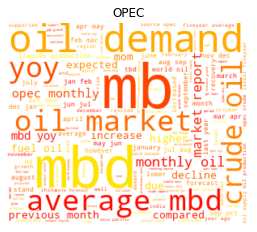

In [106]:
word_cloud('OPEC',cleaned_speeches,'autumn',20)

In [107]:
df_transcripts=pd.DataFrame({"Transcripts" :([cleaned_speeches]) }, index=['OPEC'])
df_transcripts

,Transcripts
OPEC,january feature article monetary policies an...


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_transcripts.Transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_transcripts.index
data = data_dtm
data = data.transpose()
data

,OPEC
aalqahtaniopecorg,12
aand,1
abate,4
abated,3
abbreviations,24
...,...
zeta,5
zhejiang,1
zhenhua,1
zinc,12


In [109]:
top_words=[]
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'OPEC': [('mbd', 7205),
  ('oil', 6268),
  ('crude', 3886),
  ('opec', 3781),
  ('average', 3257),
  ('yoy', 3178),
  ('demand', 3174),
  ('mb', 2793),
  ('month', 2486),
  ('mom', 2449),
  ('production', 2445),
  ('growth', 2253),
  ('market', 1998),
  ('forecast', 1845),
  ('total', 1730),
  ('oecd', 1716),
  ('monthly', 1677),
  ('year', 1671),
  ('product', 1471),
  ('tbd', 1459),
  ('supply', 1445),
  ('compared', 1442),
  ('fuel', 1429),
  ('higher', 1410),
  ('sources', 1399),
  ('liquids', 1329),
  ('lower', 1311),
  ('world', 1211),
  ('rose', 1209),
  ('report', 1152),
  ('china', 1148),
  ('graph', 1137),
  ('stocks', 1117),
  ('change', 1106),
  ('europe', 1105),
  ('previous', 1065),
  ('asia', 1052),
  ('gasoline', 1042),
  ('jan', 1022),
  ('sep', 1013),
  ('apr', 1001),
  ('mar', 1000),
  ('jul', 997),
  ('aug', 979),
  ('feb', 975),
  ('jun', 974),
  ('oct', 967),
  ('prices', 958),
  ('nov', 958),
  ('dec', 957)]}

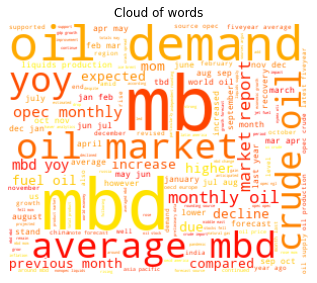

In [111]:
word_cloud('Cloud of words',cleaned_speeches,'autumn',25)

In [ ]:
# Le prb c'est que l'on perd la trace des dates des speeches ! 
# Du coup quand on met dans un data frame ça donne ça : 

In [112]:
df_transcripts=pd.DataFrame({"Transcripts" :([cleaned_speeches]) }, index=['OPEC'])
df_transcripts

,Transcripts
OPEC,january feature article monetary policies an...


In [113]:
all_speeches = []*len(all_files)
df_speeches = []
# on ouvre, def un df et on l'append
for f in all_files: 
    file=opentxtfile(f)
    df_speeches_=pd.DataFrame({"Transcripts" :([file]) }, index=[f])
    df_speeches.append(df_speeches_)
df_speeches[1] # on garde la trace des dates 

,Transcripts
02_21.txt,11 February 2021 Feature article: Review of gl...


In [114]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_transcripts.Transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_transcripts.index
data = data_dtm
data = data.transpose()
data

,OPEC
aalqahtaniopecorg,12
aand,1
abate,4
abated,3
abbreviations,24
...,...
zeta,5
zhejiang,1
zhenhua,1
zinc,12


In [115]:
top_words=[]
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{'OPEC': [('mbd', 7205),
  ('oil', 6268),
  ('crude', 3886),
  ('opec', 3781),
  ('average', 3257),
  ('yoy', 3178),
  ('demand', 3174),
  ('mb', 2793),
  ('month', 2486),
  ('mom', 2449)]}

# N-Grams

In [116]:
import pandas as pd
import numpy as np

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

from string import punctuation
punctuation = punctuation[0:5]+punctuation[7:]
import math
import random

# First N-grams using NLTK

In [117]:
import re
from nltk.util import ngrams

In [118]:
data = cleaned_speeches.lower()
data = re.sub(r'[^a-zA-Z0-9\s]', ' ', data)
tokens = [token for token in data.split(" ") if token != ""]
output = list(ngrams(tokens, 5))
output # not very good ... 

[('january', 'feature', 'article', 'monetary', 'policies'),
 ('feature', 'article', 'monetary', 'policies', 'and'),
 ('article', 'monetary', 'policies', 'and', 'their'),
 ('monetary', 'policies', 'and', 'their', 'impact'),
 ('policies', 'and', 'their', 'impact', 'on'),
 ('and', 'their', 'impact', 'on', 'the'),
 ('their', 'impact', 'on', 'the', 'oil'),
 ('impact', 'on', 'the', 'oil', 'market'),
 ('on', 'the', 'oil', 'market', 'oil'),
 ('the', 'oil', 'market', 'oil', 'market'),
 ('oil', 'market', 'oil', 'market', 'highlights'),
 ('market', 'oil', 'market', 'highlights', 'i'),
 ('oil', 'market', 'highlights', 'i', 'feature'),
 ('market', 'highlights', 'i', 'feature', 'article'),
 ('highlights', 'i', 'feature', 'article', 'iii'),
 ('i', 'feature', 'article', 'iii', 'crude'),
 ('feature', 'article', 'iii', 'crude', 'oil'),
 ('article', 'iii', 'crude', 'oil', 'price'),
 ('iii', 'crude', 'oil', 'price', 'movements'),
 ('crude', 'oil', 'price', 'movements', 'commodity'),
 ('oil', 'price', 'mov

In [ ]:
Improvements: 
    - 
    - stemming
    - More depths
    - Learning